In [1]:
import pandas as pd
import seaborn as sns

In [2]:
matches = pd.read_csv('../data/serie_a_matches_cleaned.csv')
league_table = pd.read_csv('../data/serie_a_league_table.csv')

In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          380 non-null    int64  
 1   status      380 non-null    object 
 2   matchday    380 non-null    int64  
 3   homeTeam    380 non-null    object 
 4   awayTeam    380 non-null    object 
 5   date_month  380 non-null    int64  
 6   time_hour   380 non-null    int64  
 7   ft_home     186 non-null    float64
 8   ft_away     186 non-null    float64
 9   ht_home     185 non-null    float64
 10  ht_away     185 non-null    float64
 11  winner      380 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 35.8+ KB


<Axes: xlabel='status', ylabel='count'>

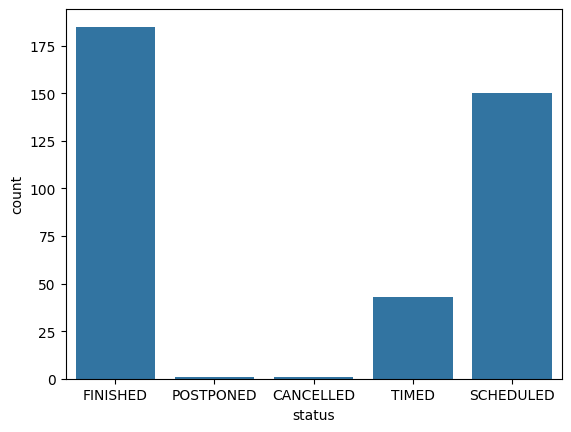

In [4]:
sns.countplot(data=matches, x='status')

In [5]:
matches_played = matches[matches['status'] == 'FINISHED']
matches_to_play = matches[matches['status'] != 'FINISHED']

In [6]:
matches_played.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 186
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          185 non-null    int64  
 1   status      185 non-null    object 
 2   matchday    185 non-null    int64  
 3   homeTeam    185 non-null    object 
 4   awayTeam    185 non-null    object 
 5   date_month  185 non-null    int64  
 6   time_hour   185 non-null    int64  
 7   ft_home     185 non-null    float64
 8   ft_away     185 non-null    float64
 9   ht_home     185 non-null    float64
 10  ht_away     185 non-null    float64
 11  winner      185 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 18.8+ KB


In [7]:
matches_to_play.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 82 to 379
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          195 non-null    int64  
 1   status      195 non-null    object 
 2   matchday    195 non-null    int64  
 3   homeTeam    195 non-null    object 
 4   awayTeam    195 non-null    object 
 5   date_month  195 non-null    int64  
 6   time_hour   195 non-null    int64  
 7   ft_home     1 non-null      float64
 8   ft_away     1 non-null      float64
 9   ht_home     0 non-null      float64
 10  ht_away     0 non-null      float64
 11  winner      195 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 19.8+ KB


In [8]:
# Merge home team league position and goals
matches = matches.merge(league_table[['team', 'leaguePosition', 'goalScored', 'goalConceded']], left_on='homeTeam', right_on='team', how='left')
matches.rename(columns={'leaguePosition': 'homeLeaguePosition', 'goalScored': 'homeGoalsScored', 'goalConceded': 'homeGoalsConceded'}, inplace=True)
matches.drop(columns=['team'], inplace=True)

# Merge away team league position and goals
matches = matches.merge(league_table[['team', 'leaguePosition', 'goalScored', 'goalConceded']], left_on='awayTeam', right_on='team', how='left')
matches.rename(columns={'leaguePosition': 'awayLeaguePosition', 'goalScored': 'awayGoalsScored', 'goalConceded': 'awayGoalsConceded'}, inplace=True)
matches.drop(columns=['team'], inplace=True)


In [7]:
matches

,id,status,matchday,homeTeam,awayTeam,date_month,time_hour,ft_home,ft_away,ht_home,ht_away,winner
0,503046,FINISHED,1,Genoa,Inter,8,16,2.0,2.0,1.0,1.0,1
1,503052,FINISHED,1,Parma,Fiorentina,8,16,1.0,1.0,1.0,0.0,1
2,503045,FINISHED,1,Empoli,Monza,8,18,0.0,0.0,0.0,0.0,1
3,503051,FINISHED,1,Milan,Torino,8,18,2.0,2.0,0.0,1.0,1
4,503043,FINISHED,1,Bologna,Udinese,8,16,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
375,503418,SCHEDULED,38,Milan,Monza,5,0,NaN,NaN,NaN,NaN,2
376,503419,SCHEDULED,38,Napoli,Cagliari,5,0,NaN,NaN,NaN,NaN,2
377,503420,SCHEDULED,38,Torino,Roma,5,0,NaN,NaN,NaN,NaN,2
378,503421,SCHEDULED,38,Udinese,Fiorentina,5,0,NaN,NaN,NaN,NaN,2
